In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm
from scipy.stats import skew
from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.10f}'.format
np.set_printoptions(precision=None, suppress=True)

In [2]:
df = pd.read_pickle("golden_data_not_dummy.pkl")
df.head()

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,body,body_color,gearing_type,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,fuel,nr_of_doors,nr_of_seats,type,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0000000000,Audi,A1,66.0000000000,56013,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,3.8000000000,Sedans,Black,Automatic,1,15770,3,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,diesel,5.0000000000,5.0000000000,Used,1,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000
1,1798.0000000000,Audi,A1,141.0000000000,80000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,1.0000000000,5.6000000000,Sedans,Red,Automatic,0,14500,2,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000,0.0000000000,0.0000000000,gasoline,3.0000000000,4.0000000000,Used,0,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,0.0000000000,1.0000000000,0.0000000000,1.0000000000,0.00

In [3]:
df = pd.get_dummies(df, drop_first =True)

In [4]:
X = df.drop("price", axis =1)
y = df["price"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)


In [8]:
y_pred

array([18663.15870732, 19695.2969765 , 21664.95907751, ...,
       14266.8115744 , 24509.66967336, 24168.83655076])

In [9]:
df_compare = pd.DataFrame({"actual":y_test, "pred":y_pred,"diff%":abs((y_test-y_pred)/y_pred)*100})
df_compare

,actual,pred,diff%
4446,19900,18663.1587073205,6.6271809187
6686,16900,19695.2969765048,14.1927130108
12226,20825,21664.9590775082,3.8770397604
8791,6500,4692.9888420257,38.5044844299
1151,18980,17466.3561197986,8.6660541547
...,...,...,...
15549,29900,35748.3829716872,16.3598531892
13316,11990,12354.3928697800,2.9495004216
10643,14590,14266.8115743973,2.2653164228
12715,27157,24509.6696733630,10.8011668942


In [10]:
df_compare['diff%'].mean()

12.78296820168792

In [11]:
len(list(df.columns))

130

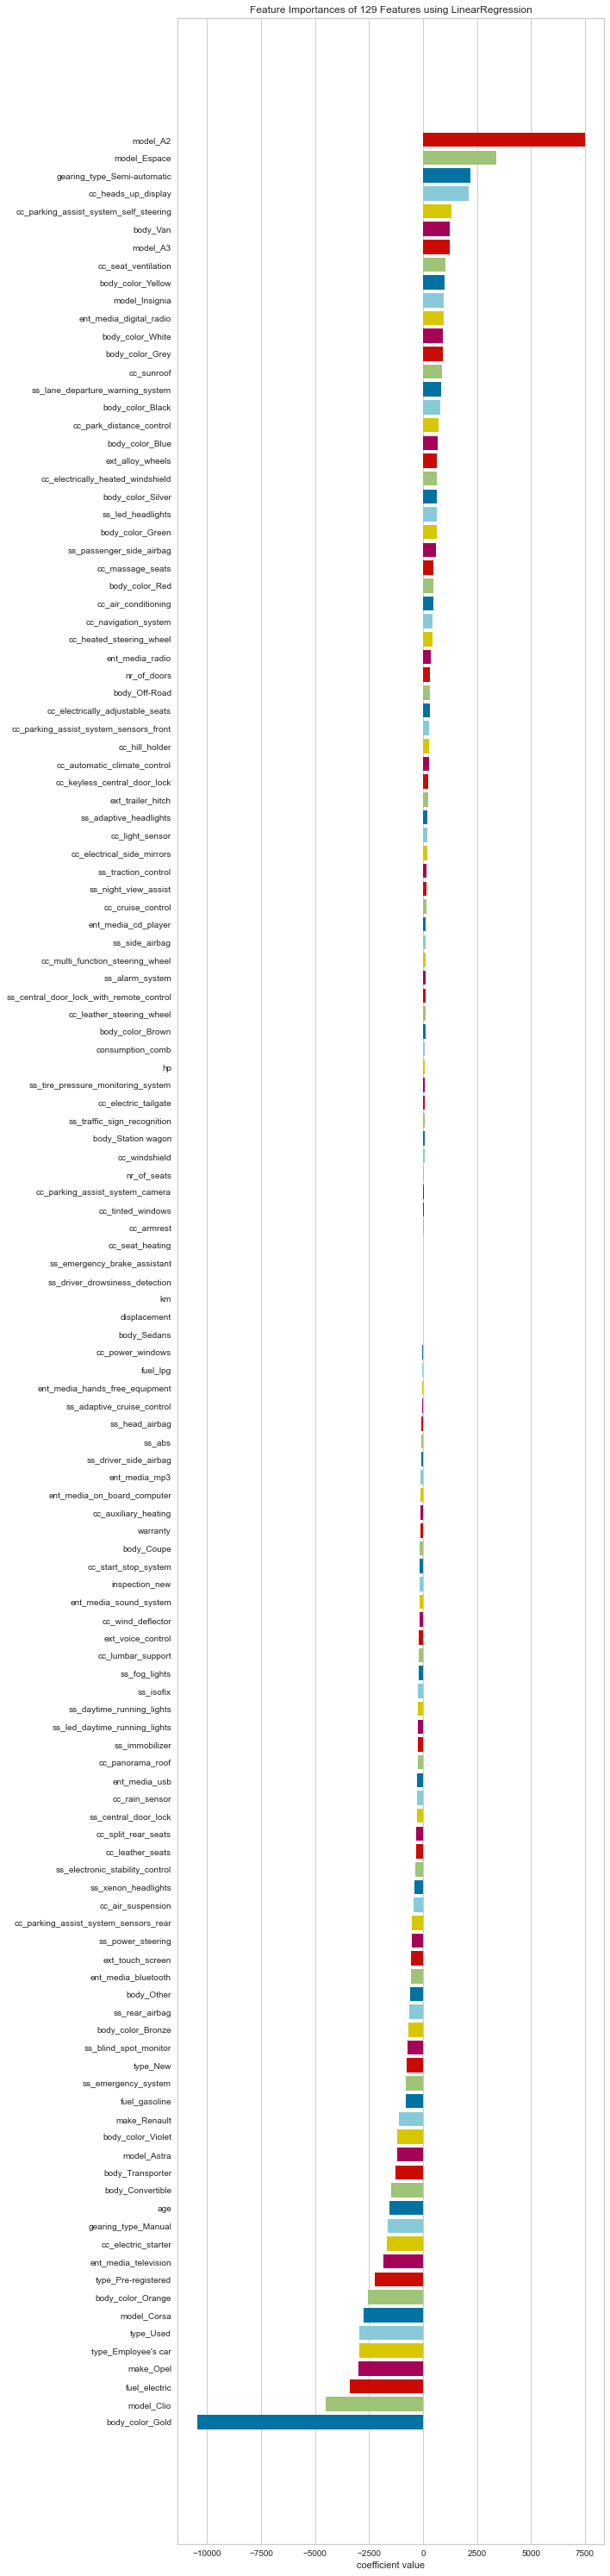

<AxesSubplot:title={'center':'Feature Importances of 129 Features using LinearRegression'}, xlabel='coefficient value'>

In [12]:
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

viz = FeatureImportances(model, labels=X.columns, relative = False)
visualizer = RadViz(size=(720, 3000))
viz.fit(X_train, y_train)
viz.show()

In [13]:
df=pd.read_pickle("golden_data_not_dummy.pkl")
df_new = df[["model", "hp", "km","age", "price", "gearing_type", "fuel","body_color"]]

In [14]:
df_new[df_new.model == "A2"]

,model,hp,km,age,price,gearing_type,fuel,body_color
2614,A2,85.0000000000,26166,1,28200,Manual,diesel,Grey


In [15]:
df_new.drop(index=[2614], inplace =True)

In [16]:
df_new = pd.get_dummies(df_new, drop_first = True)

In [17]:
X = df_new.drop(columns = ["price"])
y= df_new.price

In [18]:
scaler = StandardScaler()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

In [22]:
final_model = LinearRegression()

In [23]:
final_model.fit(X_train,y_train)

LinearRegression()

In [24]:
print(final_model.score(X_train,y_train))
print(final_model.score(X_test,y_test))

0.8491275117985028
0.8586299813706103


In [26]:
df_new.columns.to_list()

['hp',
 'km',
 'age',
 'price',
 'model_A3',
 'model_Astra',
 'model_Clio',
 'model_Corsa',
 'model_Espace',
 'model_Insignia',
 'gearing_type_Manual',
 'gearing_type_Semi-automatic',
 'fuel_electric',
 'fuel_gasoline',
 'fuel_lpg',
 'body_color_Black',
 'body_color_Blue',
 'body_color_Bronze',
 'body_color_Brown',
 'body_color_Gold',
 'body_color_Green',
 'body_color_Grey',
 'body_color_Orange',
 'body_color_Red',
 'body_color_Silver',
 'body_color_Violet',
 'body_color_White',
 'body_color_Yellow']

In [27]:
test_info ={"model":"Astra", "hp":140, "km":10000,"age":5, "gearing_type":"Manual",
         "fuel":"gasoline","body_color":"Green"}
test_df = pd.DataFrame([test_info])
test_df

,model,hp,km,age,gearing_type,fuel,body_color
0,Astra,140,10000,5,Manual,gasoline,Green


In [28]:
test_df = pd.get_dummies(test_df).reindex(columns=X.columns, fill_value=0)
test_df

,hp,km,age,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,gearing_type_Manual,gearing_type_Semi-automatic,fuel_electric,fuel_gasoline,fuel_lpg,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Gold,body_color_Green,body_color_Grey,body_color_Orange,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow
0,140,10000,5,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
test_df = scaler.transform(test_df)
test_df

array([[ 1.94391535, -0.63992256,  3.21181844, -0.4979148 ,  2.31363471,
        -0.36519766, -0.40677221, -0.26445373, -0.43330664,  0.98028015,
        -0.17417163, -0.00976179,  0.9517123 , -0.06262542, -0.59073829,
        -0.31529885, -0.01952637, -0.13866832, -0.00976179,  9.67210161,
        -0.54376375, -0.01380591, -0.25758164, -0.3501142 , -0.03654792,
        -0.51706771, -0.04886486]])

In [30]:
final_model.predict(test_df)

array([12711.91433563])

In [31]:
import joblib

In [32]:
joblib.dump(final_model, open("d_final_model","wb"))

In [33]:
joblib.dump(scaler, open("d_scaler","wb"))
joblib.dump(X.columns, open("d_columns","wb"))


In [34]:
loaded_model = joblib.load(open("d_final_model","rb"))
loaded_scaler = joblib.load(open("d_scaler","rb"))
loaded_columns = joblib.load(open("d_columns","rb"))

In [35]:
my_dict = {
    "hp": 200,
    "age": 1,
    "km": 100000,
    "model": 'A3',
    "gearing_type": "Automatic",
    "fuel":"electric",
    "body_color":"Brown"
}
my_dict = pd.DataFrame([my_dict])
my_dict = pd.get_dummies(my_dict).reindex(columns=loaded_columns, fill_value=0)
my_dict = loaded_scaler.transform(my_dict)
loaded_model.predict(my_dict)

array([30353.28283031])